In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

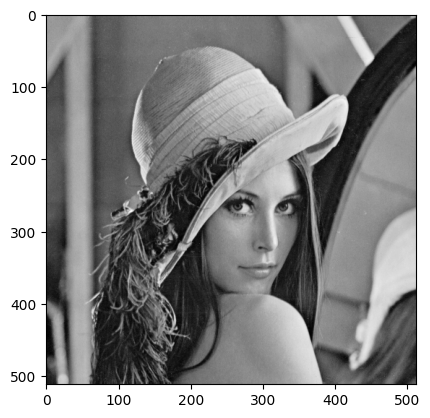

In [2]:
img = cv2.imread('lena.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

In [3]:
# Run length encoding
def rle_encode(img):
    encoded_data = []
    prev_pixel = None
    count = 0

    for pixel in img.flatten():
        if pixel == prev_pixel:
            count += 1
        else:
            if prev_pixel is not None:
                encoded_data.append((prev_pixel, count))
            prev_pixel = pixel
            count = 1
    
    encoded_data.append((prev_pixel, count))
    return np.array(encoded_data)

In [4]:
def rle_decode(encoded_data, shape):
    decoded_img = np.zeros(shape[0] * shape[1])
    i = 0
    for pixel, count in encoded_data:
        decoded_img[i:i+count] = pixel
        i += count

    return decoded_img.reshape(shape)

In [5]:
encoded_img = rle_encode(img)
decoded_img = rle_decode(encoded_img, img.shape)

(0.0, 1.0, 0.0, 1.0)

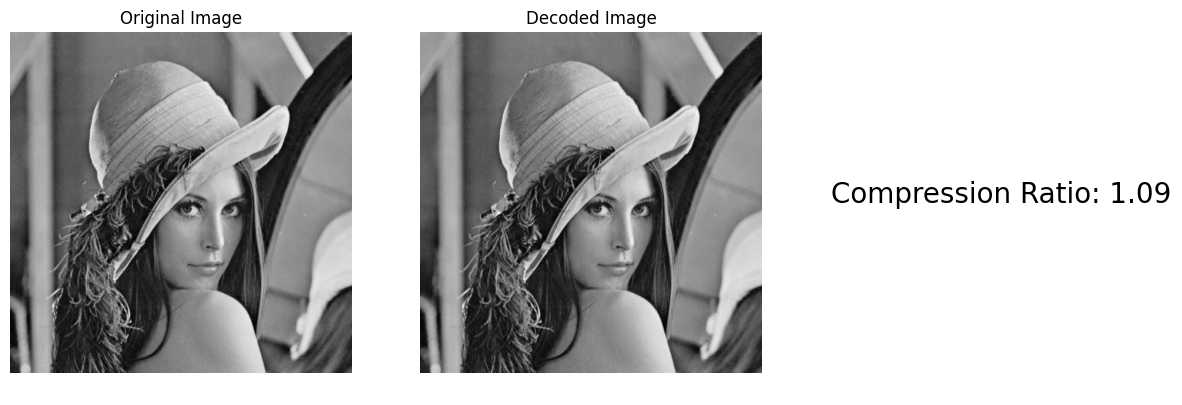

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(132)
plt.title('Decoded Image')
plt.imshow(decoded_img, cmap='gray')
plt.axis('off')

plt.subplot(133)
plt.text(0, 0.5, f'Compression Ratio: {img.size/encoded_img.shape[0]:.2f}', fontsize=20)
plt.axis('off')

In [46]:
# check if the decoded image is the same as the original image
np.all(img == decoded_img)

True